In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kagglehub import KaggleDatasetAdapter

from sklearn.preprocessing import MinMaxScaler

In [ ]:
file_path = "PS_20174392719_1491204439457_log.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ealaxi/paysim1",
  file_path,
)

print("First 5 records:", df.head())

First 5 records:    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# **Data Understanding**

| 🏷️ Column Name      | 📘 Description                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| `step`               | Time step (in hours) from the beginning of simulation.                          |
| `type`               | Type of transaction *(e.g., `CASH_OUT`, `PAYMENT`, `CASH_IN`, `TRANSFER`, `DEBIT`)*. |
| `amount`             | Transaction amount.                                                             |
| `nameOrig`           | Customer initiating the transaction.                                            |
| `oldbalanceOrg`      | Initial balance of the origin account.                                          |
| `newbalanceOrig`     | New balance of the origin account.                                              |
| `nameDest`           | Recipient of the transaction.                                                   |
| `oldbalanceDest`     | Initial balance of the destination account.                                     |
| `newbalanceDest`     | New balance of the destination account.                                         |
| `isFraud`            | **1** if the transaction is fraudulent, **0** otherwise.                        |
| `isFlaggedFraud`     | Indicates if the transaction was flagged as suspicious based on heuristics.     |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [ ]:
print("Count of unique nameOrig:", df['nameOrig'].nunique())  # Almost every transaction has a unique sender
print("Count of unique nameDest:", df['nameDest'].nunique())  # Single fraudster account (nameDest) collecting funds from many victims (nameOrig).
print("Number of records:", len(df))

Count of unique nameOrig: 6353307
Count of unique nameDest: 2722362
Number of records: 6362620


In [ ]:
numerical_features = []
categorical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [ ]:
df['isFraud'].value_counts(normalize=True) # There Exist Imbalance in the target variable

,proportion
isFraud,
0,0.998709
1,0.001291


In [ ]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for feature in numerical_features:
    outliers = detect_outliers_iqr(df[feature])
    print(f"Number of outliers in {feature}: {len(outliers):,} / {len(df[feature]):,}")
    print(f"Percentage of outliers: {len(outliers) / len(df[feature]) * 100:.2f}%")
    print("-" * 20)

Number of outliers in step: 102,688 / 6,362,620
Percentage of outliers: 1.61%
--------------------
Number of outliers in amount: 338,078 / 6,362,620
Percentage of outliers: 5.31%
--------------------
Number of outliers in oldbalanceOrg: 1,112,507 / 6,362,620
Percentage of outliers: 17.49%
--------------------
Number of outliers in newbalanceOrig: 1,053,391 / 6,362,620
Percentage of outliers: 16.56%
--------------------
Number of outliers in oldbalanceDest: 786,135 / 6,362,620
Percentage of outliers: 12.36%
--------------------
Number of outliers in newbalanceDest: 738,527 / 6,362,620
Percentage of outliers: 11.61%
--------------------
Number of outliers in isFraud: 8,213 / 6,362,620
Percentage of outliers: 0.13%
--------------------
Number of outliers in isFlaggedFraud: 16 / 6,362,620
Percentage of outliers: 0.00%
--------------------


# **Exploratory Data Analysis**

## **Categorical Features**

In [ ]:
categorical_features

['type', 'nameOrig', 'nameDest']

<ipython-input-29-9db461a7558f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='isFraud', data=df, palette='Set2')
<ipython-input-29-9db461a7558f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='isFlaggedFraud', data=df, palette='Set3')


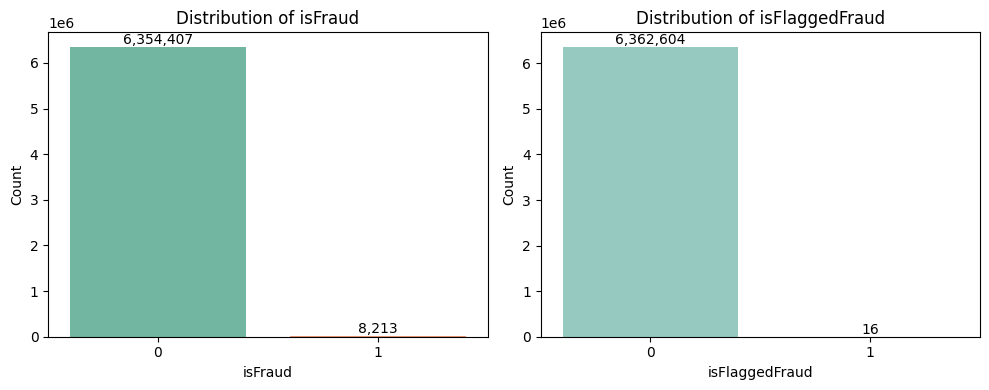

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='isFraud', data=df, palette='Set2')
plt.title('Distribution of isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height()):,}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='isFlaggedFraud', data=df, palette='Set3')
plt.title('Distribution of isFlaggedFraud')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Count')
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height()):,}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

<ipython-input-45-df9e3ff51e62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=df, order=df['type'].value_counts().index, palette='Set3')


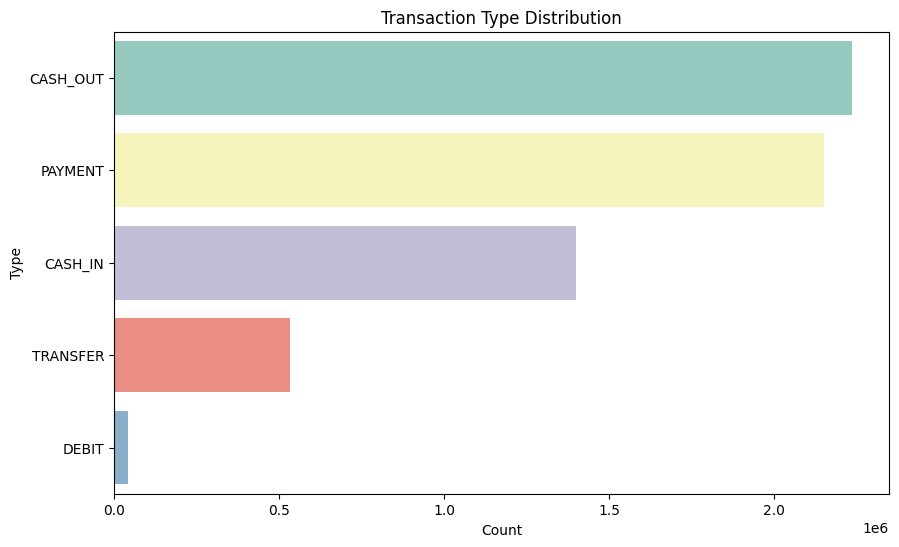

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=df, order=df['type'].value_counts().index, palette='Set3')
plt.title("Transaction Type Distribution")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

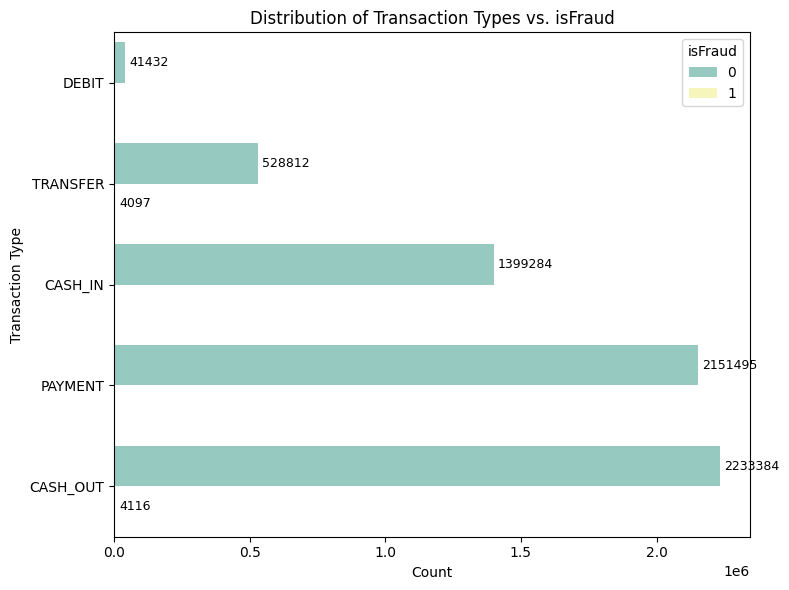

In [ ]:
type_order = df['type'].value_counts().sort_values().index.tolist()

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    y='type',
    hue='isFraud',
    data=df,
    order=type_order,
    palette='Set3'
)

plt.title('Distribution of Transaction Types vs. isFraud')
plt.xlabel('Count')
plt.ylabel('Transaction Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

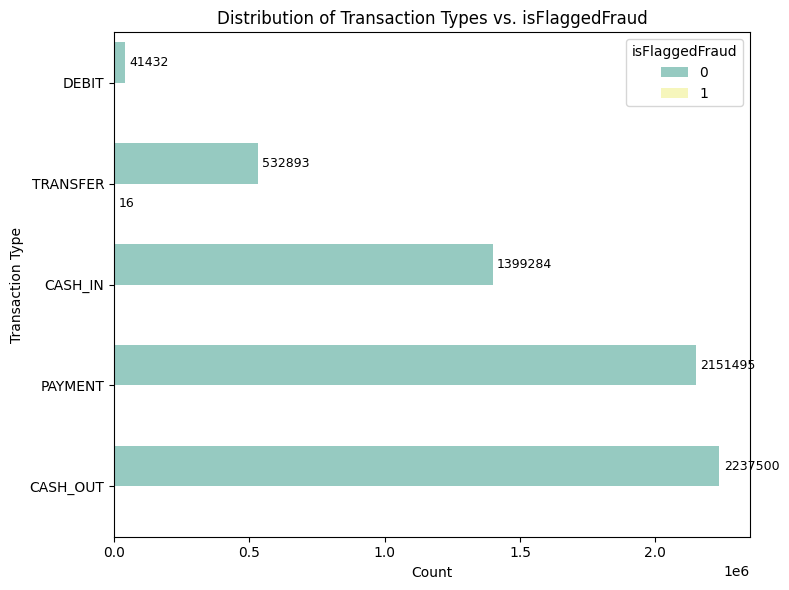

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    y='type',
    hue='isFlaggedFraud',
    data=df,
    order=type_order,
    palette='Set3'
)

plt.title('Distribution of Transaction Types vs. isFlaggedFraud')
plt.xlabel('Count')
plt.ylabel('Transaction Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

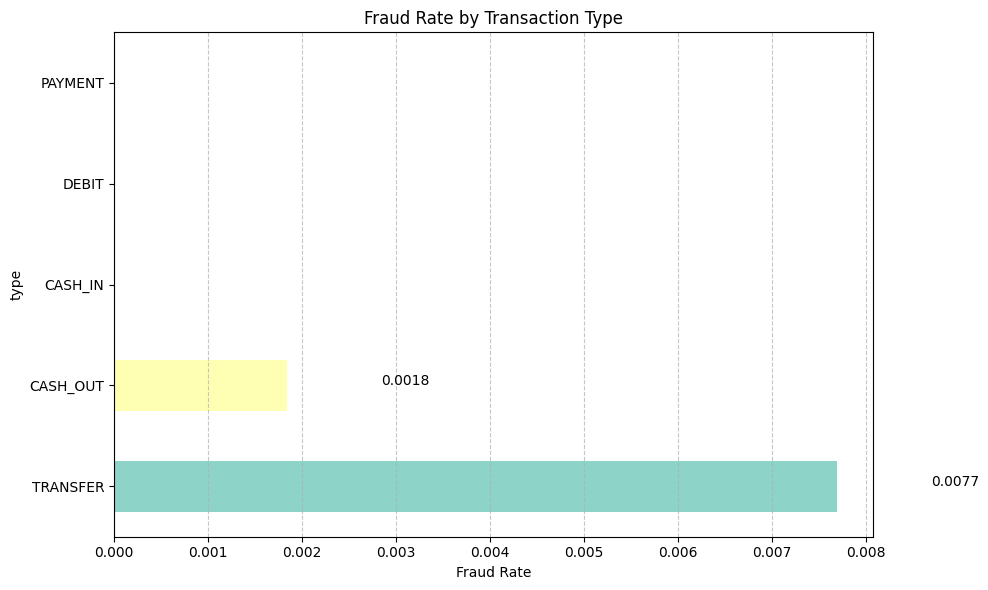

In [ ]:
fraud_type_rate = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

colors = sns.color_palette("Set3", len(fraud_type_rate))
fraud_type_rate.plot(kind='barh', figsize=(10, 6), color=colors)
plt.xlabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Type')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(fraud_type_rate):
    if value == 0 :
      continue
    else:
      plt.text(value + 0.001, index, f"{value:.4f}")

plt.tight_layout()
plt.show()

## **Numerical Features**

In [ ]:
numerical_features

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

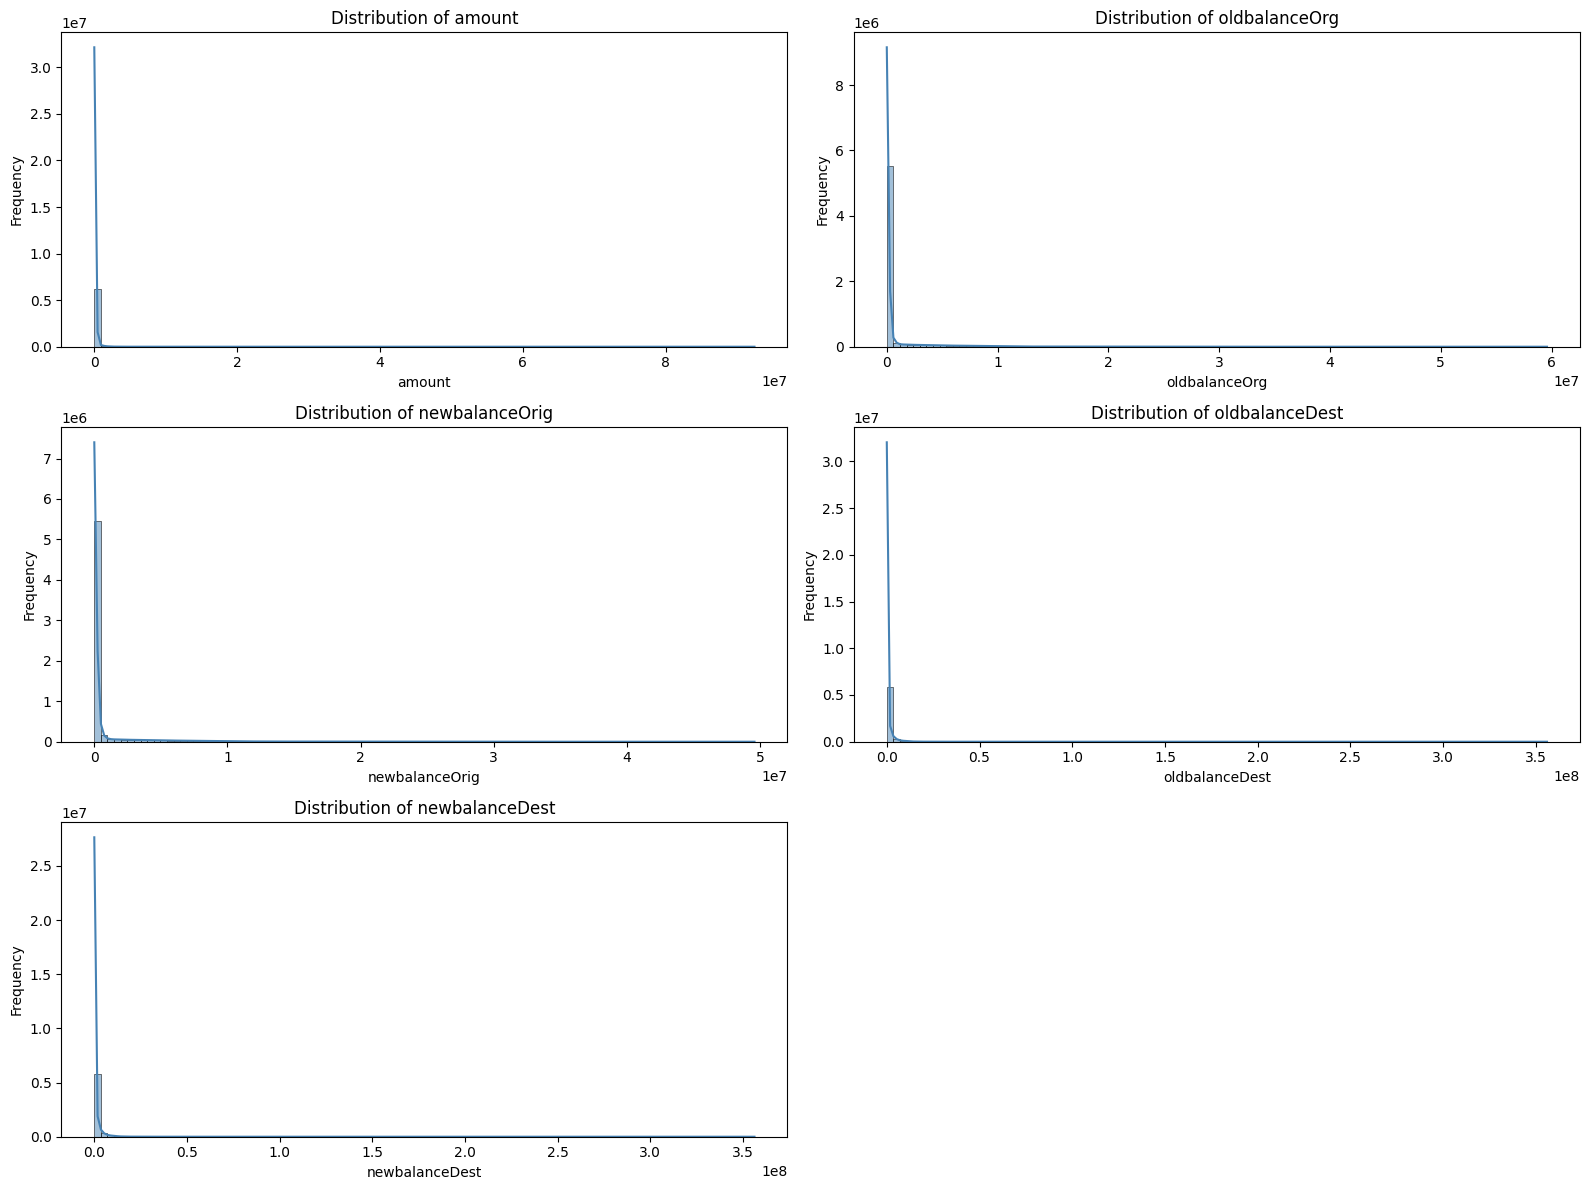

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=100, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-34-05daef275d6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='coolwarm', showfliers=False)
<ipython-input-34-05daef275d6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='coolwarm', showfliers=False)
<ipython-input-34-05daef275d6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y=col, data=df, palette='coolwarm', showfliers=False)
<ipython-input-34-05daef275d6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

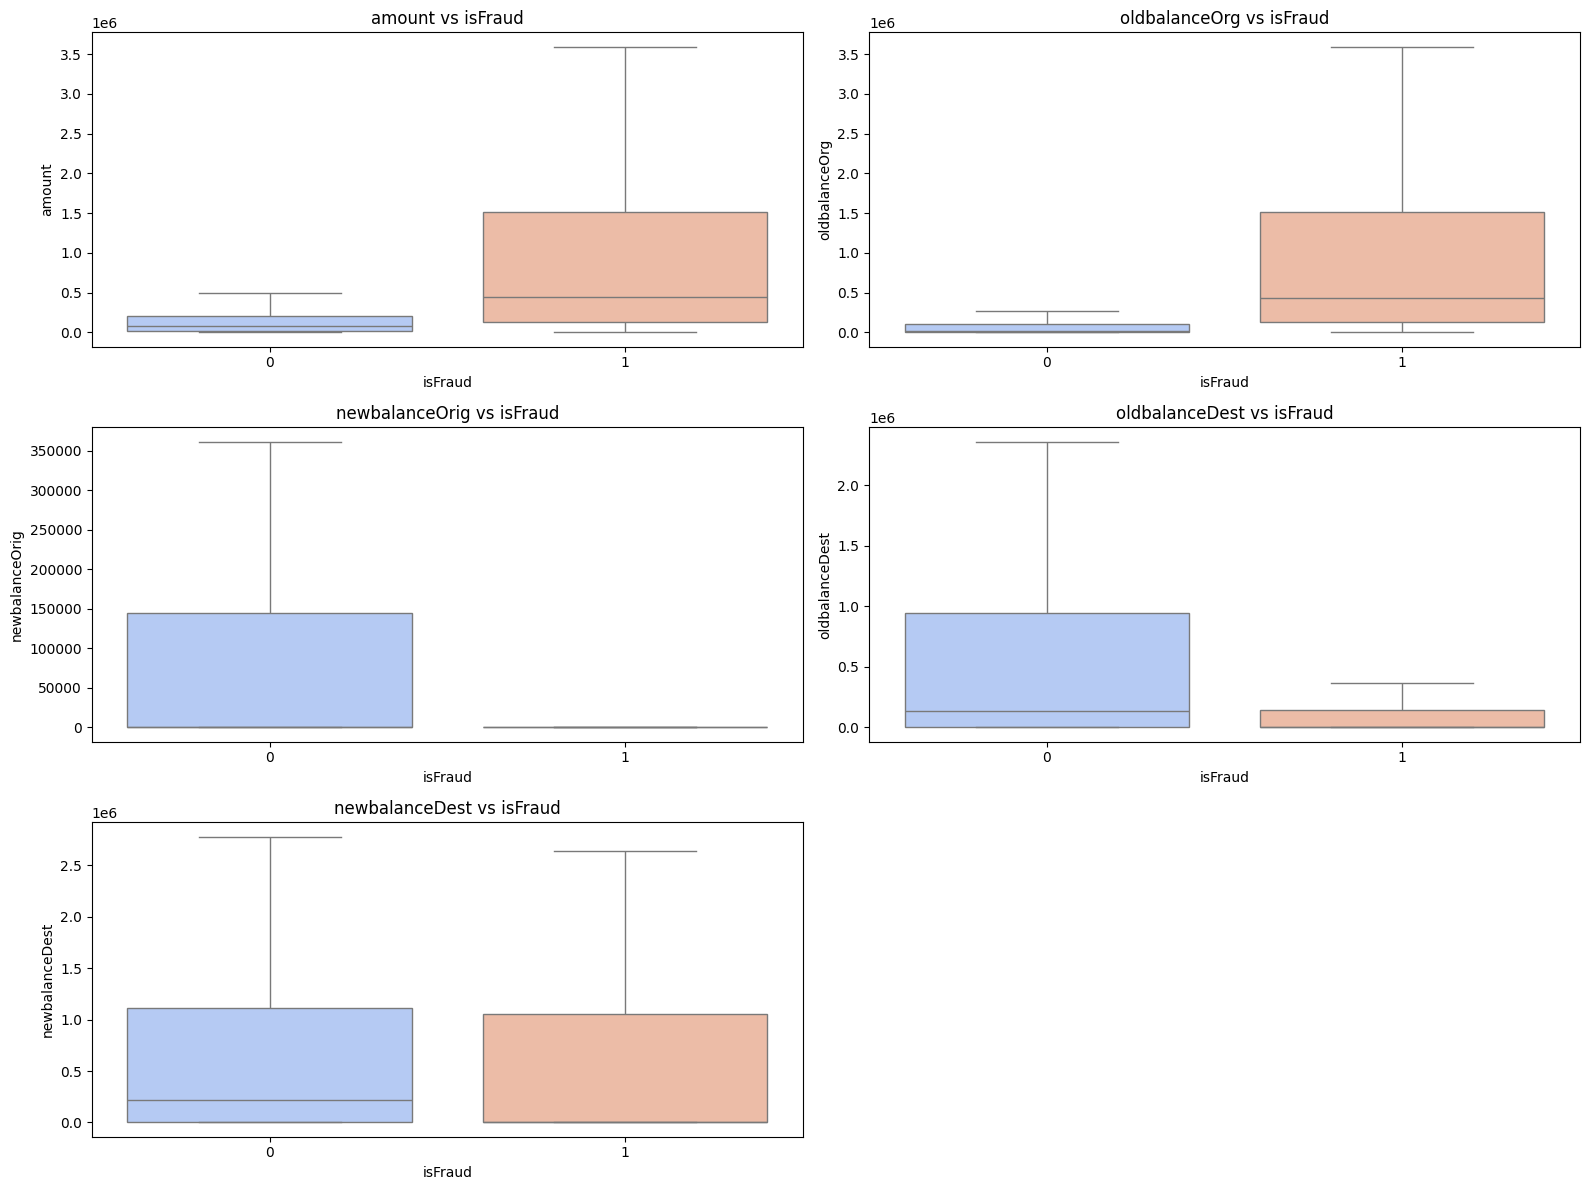

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='isFraud', y=col, data=df, palette='Set3', showfliers=False)
    plt.title(f'{col} vs isFraud')
    plt.xlabel('isFraud')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

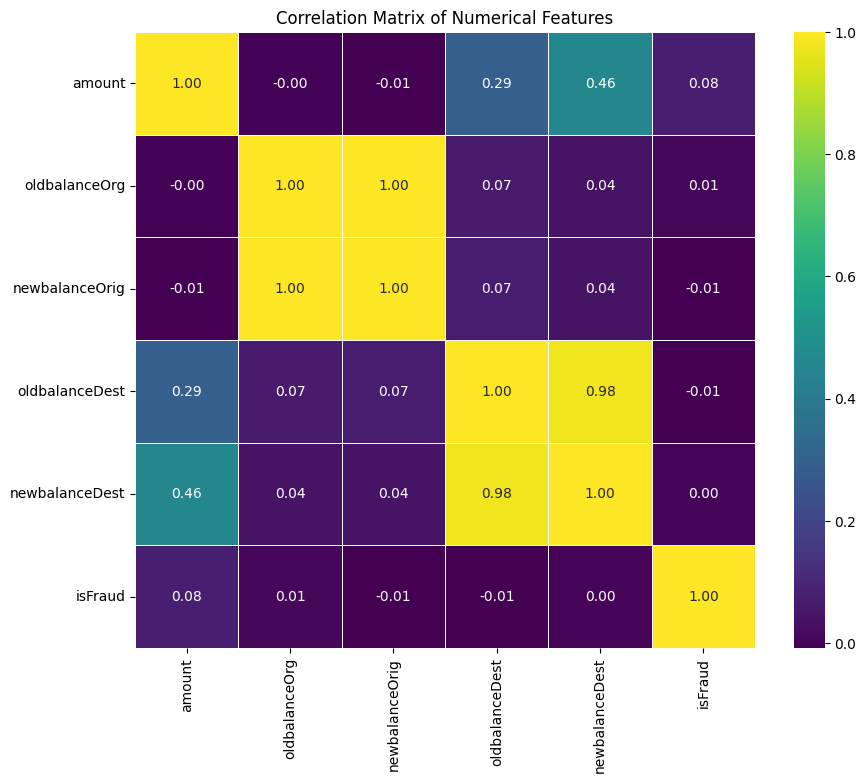

In [ ]:
corr_matrix = df[numerical_features + ['isFraud']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

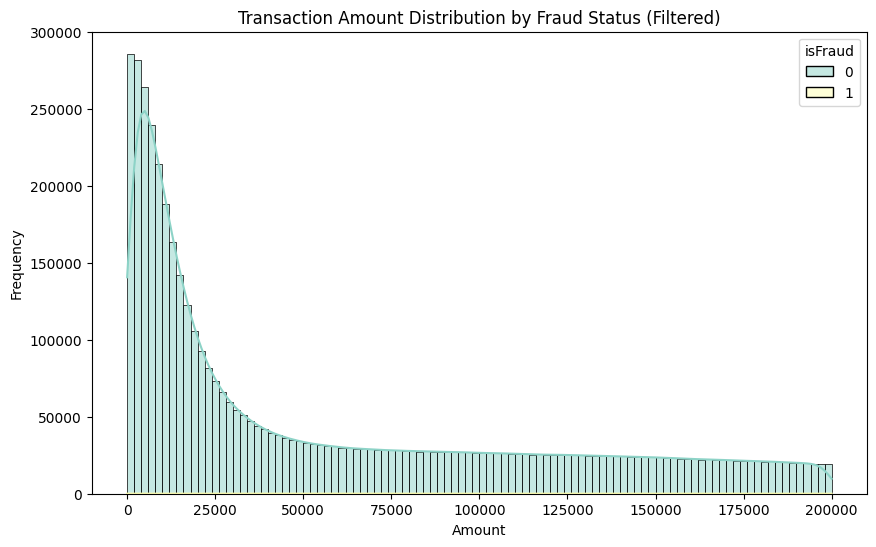

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['amount'] < 200000], x='amount', hue='isFraud', bins=100, kde=True, palette='Set3')
plt.title("Transaction Amount Distribution by Fraud Status (Filtered)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

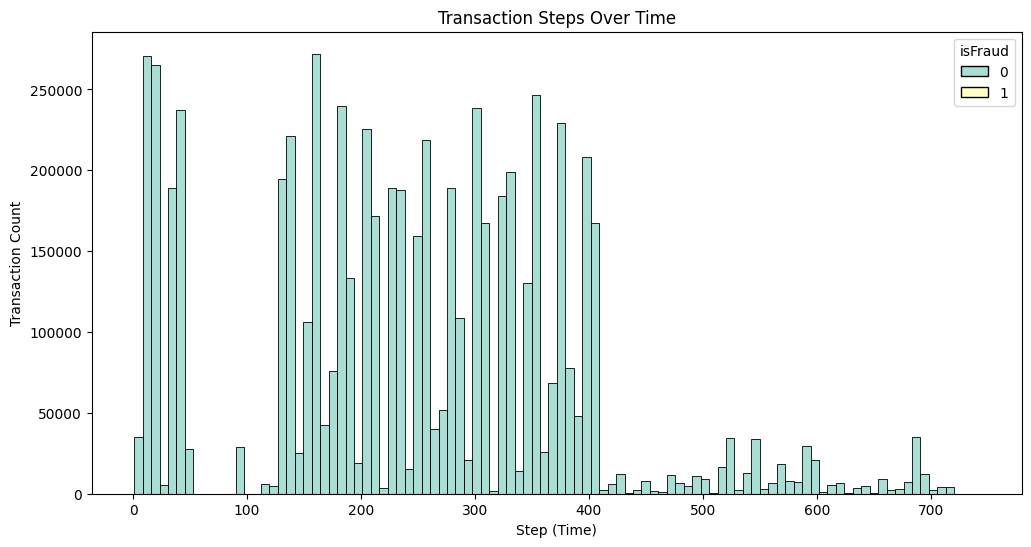

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='step', hue='isFraud', bins=100, multiple='stack', palette='Set3')
plt.title("Transaction Steps Over Time")
plt.xlabel("Step (Time)")
plt.ylabel("Transaction Count")
plt.show()

# **Data Preprocessing**

1. Encode Categorical Features
2. Scale Numerical Features
3. Resample isFraud and isFlaggedFraud
4. Handle Outliers  


In [ ]:
df_encoded = pd.get_dummies(df, columns=['type'], prefix='type') # They are nominal with low unique values
df_encoded

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True
